In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('../../../data/covid_data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251577,ZWE,Africa,Zimbabwe,2023-01-16,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
251578,ZWE,Africa,Zimbabwe,2023-01-17,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
251579,ZWE,Africa,Zimbabwe,2023-01-18,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
251580,ZWE,Africa,Zimbabwe,2023-01-19,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../../../data/covid_data.csv')
df

grouped = df[['date', 'continent', 'new_cases']].groupby(['date', 'continent']).sum()
grouped = grouped.unstack(1)
grouped

new_cases                                                        
continent     Africa      Asia   Europe North America  Oceania South America
date                                                                        
2020-01-01       NaN       NaN      NaN           0.0      NaN           0.0
2020-01-02       NaN       NaN      NaN           0.0      NaN           0.0
2020-01-03       NaN       NaN      NaN           0.0      NaN           0.0
2020-01-04       NaN       0.0      NaN           0.0      NaN           0.0
2020-01-05       NaN       0.0      NaN           0.0      NaN           0.0
...              ...       ...      ...           ...      ...           ...
2023-01-16    1002.0  118153.0  37669.0        9813.0     11.0       46261.0
2023-01-17    3922.0  197154.0  38267.0       83173.0      3.0       27680.0
2023-01-18    1321.0  185432.0  32177.0      136071.0     63.0       21720.0
2023-01-19     924.0  149209.0  52560.0       96365.0  18062.0        5223.0
2023-01-20     585.0  134312.0  93741.0       62508.0   8906.0       43411.0

[1116 rows x 6 columns]

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../../../data/covid_data.csv')
df

grouped = df[['date', 'continent', 'new_cases']].groupby(['date', 'continent']).sum()
grouped = grouped.unstack(1)
grouped = grouped.fillna(0)  # Fill missing values with zero
grouped = grouped.droplevel(0, axis=1)  # Drop the new_cases column level
grouped

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2023-01-16,1002.0,118153.0,37669.0,9813.0,11.0,46261.0
2023-01-17,3922.0,197154.0,38267.0,83173.0,3.0,27680.0
2023-01-18,1321.0,185432.0,32177.0,136071.0,63.0,21720.0


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../../../data/covid_data.csv')
df

grouped = df[['date', 'continent', 'new_cases']].groupby(['date', 'continent']).sum()
grouped = grouped.unstack(1)
grouped = grouped.fillna(0)  # Fill missing values with zero
grouped = grouped.droplevel(0, axis=1)  # Drop the new_cases column level
grouped

continents = df['continent'].dropna().unique()

values = [continent for continent in continents]

print(values)

['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
<ipython-input-24-05c6de698a48>:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


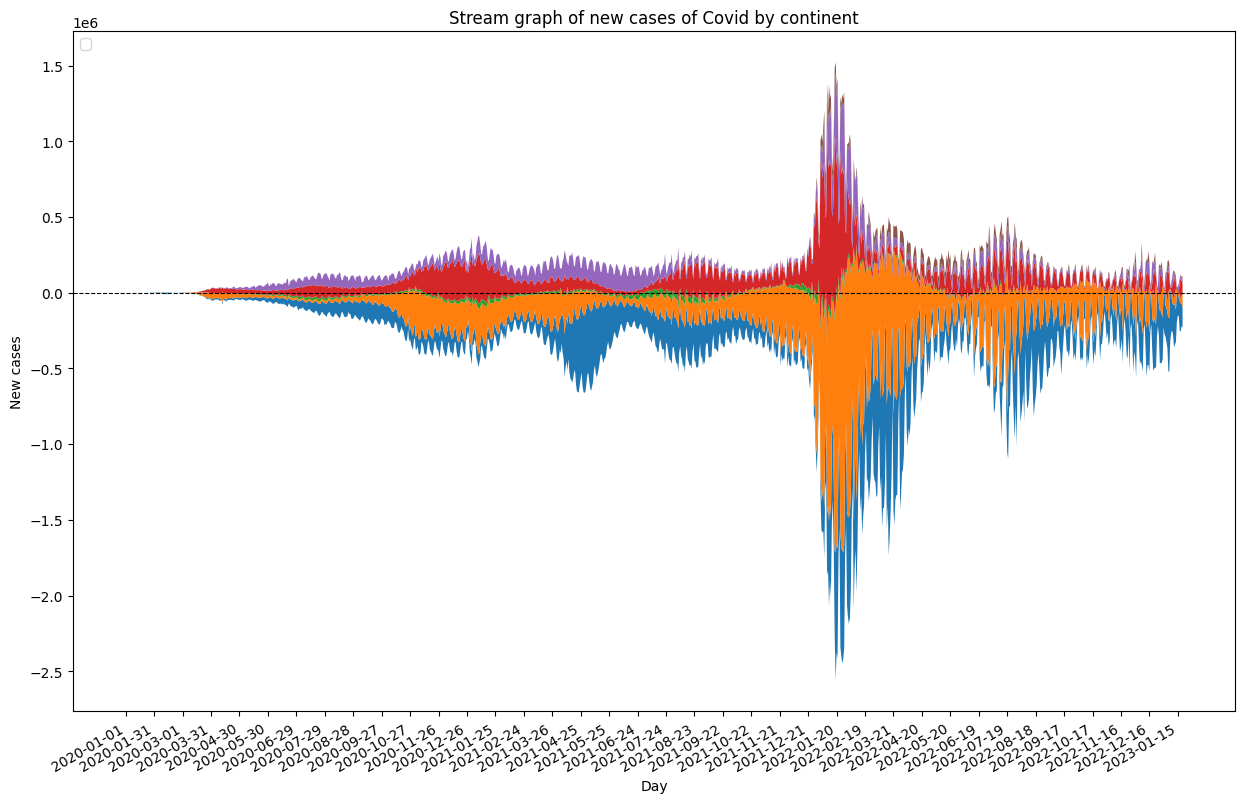

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../../../data/covid_data.csv')
df

grouped = df[['date', 'continent', 'new_cases']].groupby(['date', 'continent']).sum()
grouped = grouped.unstack(1)
grouped = grouped.fillna(0)  # Fill missing values with zero
grouped = grouped.droplevel(0, axis=1)  # Drop the new_cases column level
grouped

continents = df['continent'].dropna().unique()

values = np.array([grouped[continent] for continent in continents])

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.stackplot(
    grouped.index.values,
    values,
    baseline='wiggle'
)

ax.legend(loc='upper left')
ax.set_title('Stream graph of new cases of Covid by continent')
ax.set_xlabel('Day')
ax.set_ylabel('New cases')
ax.axhline(0, color='black', ls='--', linewidth=0.8)
fig.autofmt_xdate()
plt.xticks(np.arange(0, len(grouped.index), 30))
fig.show()

<ipython-input-25-4b27f70cb15e>:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


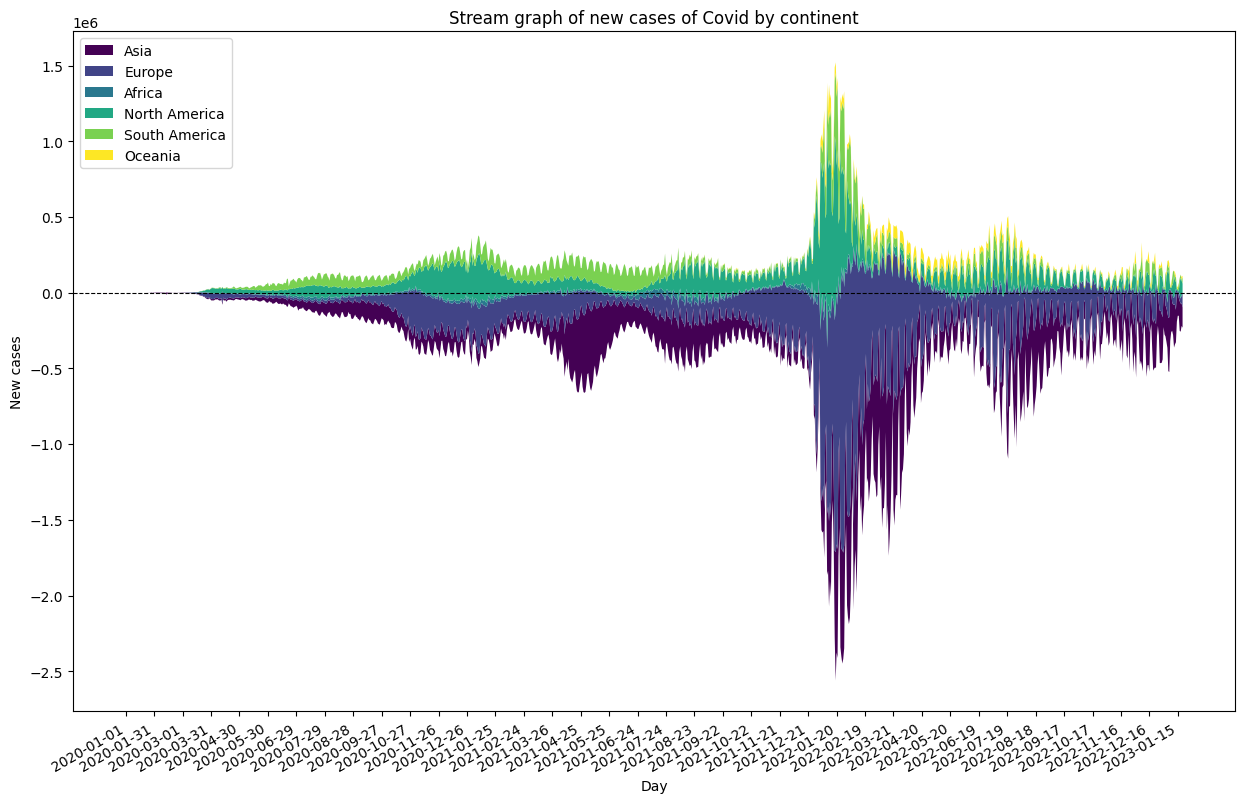

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../../../data/covid_data.csv')
df

grouped = df[['date', 'continent', 'new_cases']].groupby(['date', 'continent']).sum()
grouped = grouped.unstack(1)
grouped = grouped.fillna(0)  # Fill missing values with zero
grouped = grouped.droplevel(0, axis=1)  # Drop the new_cases column level
grouped

continents = df['continent'].dropna().unique()

values = np.array([grouped[continent] for continent in continents])

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.stackplot(
    grouped.index.values,
    values,
    baseline='wiggle',
    labels=continents,
    colors=plt.cm.viridis(np.linspace(0, 1, len(continents)))
)

ax.legend(loc='upper left')
ax.set_title('Stream graph of new cases of Covid by continent')
ax.set_xlabel('Day')
ax.set_ylabel('New cases')
ax.axhline(0, color='black', ls='--', linewidth=0.8)
fig.autofmt_xdate()
plt.xticks(np.arange(0, len(grouped.index), 30))
fig.show()